In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipies or reviews (as opposed to current events)
- Look at some examples

In [5]:
data = pd.read_csv('data/train.csv', sep='\t', na_values='?')

### EDA

In [6]:
json.loads(data.boilerplate[0]).get('title', '')

u'IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries'

In [7]:
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_

In [9]:
# Alchemy Category and Score are either both not null or both null at the same time
(data['alchemy_category_score'].isnull() ^ data['alchemy_category'].isnull()).value_counts()

False    7395
dtype: int64

In [10]:
data['alchemy_category'].value_counts()

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [11]:
data.ix[data['alchemy_category'] == 'unknown', ['alchemy_category', 'alchemy_category_score']]

,alchemy_category,alchemy_category_score
906,unknown,0.400001
934,unknown,0.400001
1351,unknown,0.400001
4547,unknown,0.400001
5491,unknown,0.400001
7015,unknown,0.400001


In [12]:
data.ix[data['alchemy_category'].isnull(), ['alchemy_category', 'alchemy_category_score']]

,alchemy_category,alchemy_category_score
5,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
13,NaN,NaN
23,NaN,NaN
24,NaN,NaN
28,NaN,NaN
29,NaN,NaN
32,NaN,NaN


In [13]:
data.ix[data['alchemy_category_score'].isnull(), ['alchemy_category', 'alchemy_category_score']]

,alchemy_category,alchemy_category_score
5,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
13,NaN,NaN
23,NaN,NaN
24,NaN,NaN
28,NaN,NaN
29,NaN,NaN
32,NaN,NaN


In [14]:
# fill in the missing values in these two columns
data.ix[data['alchemy_category'].isnull(), ['alchemy_category']] = 'unknown'
data.ix[data['alchemy_category_score'].isnull(), ['alchemy_category_score']] = 0.400001

In [15]:
# Check the is_new column and fill NaN's with 0
data['is_news'].isnull().value_counts()
data['is_news'].fillna(0, inplace=True)
print data['is_news'].value_counts()

1.0    4552
0.0    2843
Name: is_news, dtype: int64


In [16]:
# news_front_page has 1, 0 and NaN values
# Not sure how to fill in the NaN values, but probably we won't use this feature in the model
print data['news_front_page'].isnull().value_counts(), "\n"
print data['news_front_page'].value_counts()

False    6147
True     1248
Name: news_front_page, dtype: int64 

0.0    5853
1.0     294
Name: news_front_page, dtype: int64


### Create Feature and Target columns:

In [17]:
X = data[[x for x in data.columns if x not in ['label', 'url', 'url_id', 'boilerplate', 'news_front_page']]]
y = data['label']

In [18]:
# create dummy variables for the categorical features and concatenate with the numerical features
X_Numerical = X[X.dtypes[X.dtypes!='object'].index.values]
X = pd.concat((pd.get_dummies(X['alchemy_category']), X_Numerical), axis = 1)
X_columns = X.columns.values

In [19]:
from sklearn.preprocessing import MinMaxScaler

# normalize the numerical features
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Feature Selection

#### K-best:

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=10)
selector.fit(X_norm, y)
X_new = selector.fit_transform(X_norm, y)

print X_norm.shape
print X_new.shape

# the selected features based on SelectKBest with K = 10 and Chi-Square algorithm
KBestFeatures =  X_columns[selector.get_support()]
print KBestFeatures

(7395L, 35L)
(7395L, 10L)
['arts_entertainment' 'business' 'computer_internet' 'health' 'recreation'
 'sports' 'commonlinkratio_3' 'compression_ratio' 'frameTagRatio'
 'linkwordscore']


#### RFE:

In [21]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit(X_norm, y)
RfeFeatures =  X_columns[rfe.support_]
# the selected features based on RFE
print RfeFeatures

['business' 'health' 'recreation' 'commonlinkratio_3' 'commonlinkratio_4'
 'frameTagRatio' 'linkwordscore' 'non_markup_alphanum_characters'
 'numberOfLinks' 'spelling_errors_ratio']


# Feature engineering to construct new features

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
v1 = CountVectorizer(
    binary=True,  
    stop_words='english', 
    max_features=100, 
)

x1 = v1.fit_transform(data.boilerplate).todense()
pd.DataFrame(x1, columns=v1.get_feature_names()).head(2)

,10,12,15,20,2011,30,add,bake,baking,best,better,blog,body,bowl,brown,butter,com,come,cook,cooking,cool,cream,cup,cups,cut,...,salt,say,set,simple,small,sugar,sure,things,think,time,title,try,url,use,used,using,ve,want,water,way,white,work,world,year,years
0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
v2 = TfidfVectorizer(
    binary=True,  
    stop_words='english', 
    max_features=100, 
    )
x2 = v2.fit_transform(data.boilerplate).todense()
pd.DataFrame(x2, columns=v2.get_feature_names()).head(2)

,10,12,15,20,2011,30,add,bake,baking,best,better,blog,body,bowl,brown,butter,com,come,cook,cooking,cool,cream,cup,cups,cut,...,salt,say,set,simple,small,sugar,sure,things,think,time,title,try,url,use,used,using,ve,want,water,way,white,work,world,year,years
0,0.162575,0.199734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.195648,0.0,0.069084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196175,0.0,0.0,0.0,0.0,...,0.0,0.213076,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.140645,0.069084,0.0,0.069646,0.162431,0.186023,0.184616,0.0,0.000000,0.196588,0.000000,0.0,0.19157,0.192455,0.195299,0.202577
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233127,0.000000,0.0,0.092633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.255628,0.188589,0.092633,0.0,0.093388,0.217802,0.000000,0.000000,0.0,0.241484,0.000000,0.225884,0.0,0.00000,0.258061,0.261873,0.000000


### Build the Input data for the classification model:

In [24]:
NumericalFeatures = [x for x in KBestFeatures if x in RfeFeatures]

In [25]:
X_Numerical = pd.DataFrame(scaler.fit_transform(X[NumericalFeatures]), columns = NumericalFeatures)

In [26]:
X_TfIdf = pd.DataFrame(x2, columns=v2.get_feature_names())

In [27]:
df = pd.concat((X_Numerical, X_TfIdf), axis = 1)

In [28]:
df.head(2)

,business,health,recreation,commonlinkratio_3,frameTagRatio,linkwordscore,10,12,15,20,2011,30,add,bake,baking,best,better,blog,body,bowl,brown,butter,com,come,cook,...,salt,say,set,simple,small,sugar,sure,things,think,time,title,try,url,use,used,using,ve,want,water,way,white,work,world,year,years
0,1.0,0.0,0.0,0.048000,0.204241,0.24,0.162575,0.199734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.195648,0.0,0.069084,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.213076,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.140645,0.069084,0.0,0.069646,0.162431,0.186023,0.184616,0.0,0.000000,0.196588,0.000000,0.0,0.19157,0.192455,0.195299,0.202577
1,0.0,0.0,1.0,0.218182,0.222092,0.40,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233127,0.000000,0.0,0.092633,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.255628,0.188589,0.092633,0.0,0.093388,0.217802,0.000000,0.000000,0.0,0.241484,0.000000,0.225884,0.0,0.00000,0.258061,0.261873,0.000000


# Train a logit model

In [29]:
# Packages:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\shsiao\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    6.8s finished


Classification Report:               precision    recall  f1-score   support

          0       0.75      0.87      0.81      1188
          1       0.86      0.73      0.79      1253

avg / total       0.81      0.80      0.80      2441


               Predicted Non-Evergreen  Predicted Evergreen
Non-Evergreen                     1038                  150
Evergreen                          342                  911 

AUC is: 0.857821363408 

Accuracy Score is:  0.798443260959 



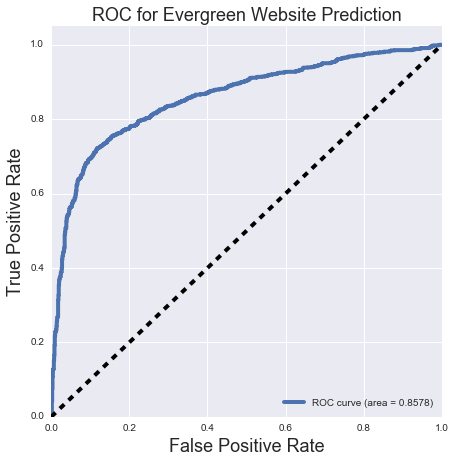

In [30]:
def modelFunc(X, Y): 
    # Perform train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y.values, 
                                                       test_size=0.33, stratify=Y.values,
                                                       random_state=77)

    # run Classification with gridsearch using GridSearchCV and 5 folds
    logreg = LogisticRegression()
    C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
    penalties = ['l1','l2']

    gs = GridSearchCV(logreg, {'penalty':penalties, 'C':C_vals}, verbose=True, cv=5, scoring='f1_macro')
    gs.fit(X_train, Y_train)

    # use this parameter to .fit, .predict, and print a classification_report for our X and Y
    gs_logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'], solver='liblinear')
    gs_logreg.fit(X_train, Y_train)
    
    Y_pred = gs_logreg.predict(X_test)
    Y_score = gs_logreg.decision_function(X_test)
    Y_proba_score = gs_logreg.predict_proba(X_test)
    
    print "Classification Report: ", (classification_report(Y_test, Y_pred)), "\n"
        
    cm = confusion_matrix(Y_test, Y_pred)
    idx = ['Non-Evergreen', 'Evergreen']
    col = ['Predicted Non-Evergreen', 'Predicted Evergreen']
    print pd.DataFrame(cm, index=idx, columns=col), "\n"

    FPR, TPR, thresholds = roc_curve(Y_test, Y_proba_score[:,1])
    ROC_AUC = auc(FPR, TPR)
    accuracy_score(Y_test, Y_pred)
    
    print "AUC is:", ROC_AUC, "\n"
    print "Accuracy Score is: ", accuracy_score(Y_test, Y_pred), "\n"

    # Plot of a ROC curve for class 1 (positive review)
    plt.figure(figsize=[7,7])
    plt.plot(FPR, TPR, label='ROC curve (area = %0.4f)' % ROC_AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('ROC for Evergreen Website Prediction', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

modelFunc(df,y)